<a href="https://colab.research.google.com/github/amylokh/Brain-MRI-Classification/blob/master/CNN%20Implementation%20VS%20Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam
from tqdm import tqdm

from keras.models import Sequential, Model
from keras.layers import MaxPooling2D, Conv2D, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D, Flatten, Input
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input,VGG16

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']


In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 150

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Dataset/Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        img = np.float32(img)
      # Normalize pixel values to be between 0 and 1
        img /= 255.0
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Dataset/Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        img = np.float32(img)
      # Normalize pixel values to be between 0 and 1
        img /= 255.0
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 78/78 [00:14<00:00,  5.27it/s]


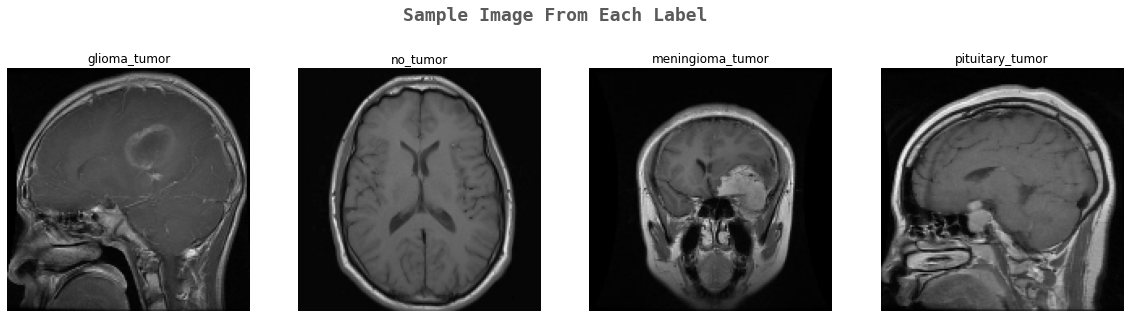

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# effneteffnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size,image_size,3))

In [ ]:
model_cnn=Sequential()
model_cnn.add(Input(shape=(image_size, image_size, 3)))

model_cnn.add(Conv2D(128,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(32,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(64, activation='relu'))

model_cnn.add(Dense(4, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop= EarlyStopping(patience=3)
reduceLR= ReduceLROnPlateau(patience=2)

In [ ]:
r1= model_cnn.fit(X_train, y_train, validation_split=0.1, epochs=20, callbacks=[reduceLR, early_stop], shuffle=True)

Epoch 1/20
81/81 [==============================] - 21s 60ms/step - loss: 0.9636 - accuracy: 0.6320 - val_loss: 7.3269 - val_accuracy: 0.0590 - lr: 0.0010
Epoch 2/20
81/81 [==============================] - 4s 49ms/step - loss: 0.6126 - accuracy: 0.7616 - val_loss: 3.2273 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 3/20
81/81 [==============================] - 4s 50ms/step - loss: 0.4254 - accuracy: 0.8266 - val_loss: 3.3518 - val_accuracy: 0.0660 - lr: 0.0010
Epoch 4/20
81/81 [==============================] - 4s 51ms/step - loss: 0.3462 - accuracy: 0.8684 - val_loss: 3.1040 - val_accuracy: 0.4097 - lr: 0.0010
Epoch 5/20
81/81 [==============================] - 4s 48ms/step - loss: 0.2234 - accuracy: 0.9137 - val_loss: 0.7596 - val_accuracy: 0.7604 - lr: 0.0010
Epoch 6/20
81/81 [==============================] - 4s 49ms/step - loss: 0.2190 - accuracy: 0.9211 - val_loss: 1.2668 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 7/20
81/81 [==============================] - 4s 52ms/step - loss: 0.

In [ ]:
model_cnn.save('Basic CNN with 85% validation accuracy')

In [ ]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)

print(loss)
print(accuracy)

13/13 [==============================] - 1s 45ms/step - loss: 4.2678 - accuracy: 0.7649
4.267787456512451
0.7648515105247498


In [ ]:
# Classification report on Test Datasets using CNN model

test_pred=np.argmax(model_cnn.predict(X_test),axis=1)
new_y = np.where(y_test==1)[1]

print(classification_report(new_y, test_pred))

13/13 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.91      0.20      0.33       100
           1       0.70      1.00      0.83       111
           2       0.71      1.00      0.83       115
           3       1.00      0.81      0.89        78

    accuracy                           0.76       404
   macro avg       0.83      0.75      0.72       404
weighted avg       0.81      0.76      0.72       404



### Implementing transfer learning



In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False)
for layers in vgg_model.layers:
    layers.trainable=False

x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.15)(x)
output=Dense(4,activation='softmax')(x)
model2=Model(inputs=vgg_model.input,outputs=output)
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint_for_transfer_learning = ModelCheckpoint("vgg16.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr_for_transfer_learning = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
r2=model2.fit(X_train, y_train, validation_split=0.1, epochs=20, callbacks=[reduce_lr_for_transfer_learning, checkpoint_for_transfer_learning, tensorboard])

Epoch 1/20
81/81 [==============================] - ETA: 0s - loss: 1.6442 - accuracy: 0.6320
Epoch 1: val_accuracy improved from -inf to 0.68056, saving model to vgg16.h5
81/81 [==============================] - 8s 83ms/step - loss: 1.6442 - accuracy: 0.6320 - val_loss: 0.9125 - val_accuracy: 0.6806 - lr: 0.0010
Epoch 2/20
81/81 [==============================] - ETA: 0s - loss: 0.5595 - accuracy: 0.8046
Epoch 2: val_accuracy did not improve from 0.68056
81/81 [==============================] - 6s 79ms/step - loss: 0.5595 - accuracy: 0.8046 - val_loss: 1.8820 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
81/81 [==============================] - ETA: 0s - loss: 0.3781 - accuracy: 0.8560
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 3: val_accuracy did not improve from 0.68056
81/81 [==============================] - 7s 81ms/step - loss: 0.3781 - accuracy: 0.8560 - val_loss: 0.9762 - val_accuracy: 0.6493 - lr: 0.0010
Epoch 4/20
81/81 [==============

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)

print(loss)
print(accuracy)

13/13 [==============================] - 3s 182ms/step - loss: 1.6698 - accuracy: 0.7525
1.6698122024536133
0.7524752616882324


In [ ]:
test_pred=np.argmax(model2.predict(X_test),axis=1)
new_y2 = np.where(y_test==1)[1]

print(classification_report(new_y2, test_pred))

13/13 [==============================] - 1s 69ms/step
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       100
           1       0.81      0.98      0.89       111
           2       0.61      0.98      0.75       115
           3       0.98      0.77      0.86        78

    accuracy                           0.75       404
   macro avg       0.85      0.74      0.72       404
weighted avg       0.83      0.75      0.71       404

